In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('heart_attack_prediction_dataset.csv')

df = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere"])

# 1. Keep only valid blood pressure formats
df = df[df['Blood Pressure'].str.match(r'^\d+/\d+$', na=False)]

# 2. Split into systolic and diastolic
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(bp_split[0])
df['Diastolic_BP'] = pd.to_numeric(bp_split[1])

# 3. Drop the original string column
df = df.drop(columns=['Blood Pressure'])

df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

df = pd.get_dummies(df, columns=['Diet'], drop_first=True)

X = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

# Optional: Apply scaling (not required but harmless)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)




# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

Accuracy: 0.6126640045636053
F1 Score: 0.20398593200468934

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.88      0.74      1125
           1       0.39      0.14      0.20       628

    accuracy                           0.61      1753
   macro avg       0.52      0.51      0.47      1753
weighted avg       0.55      0.61      0.55      1753



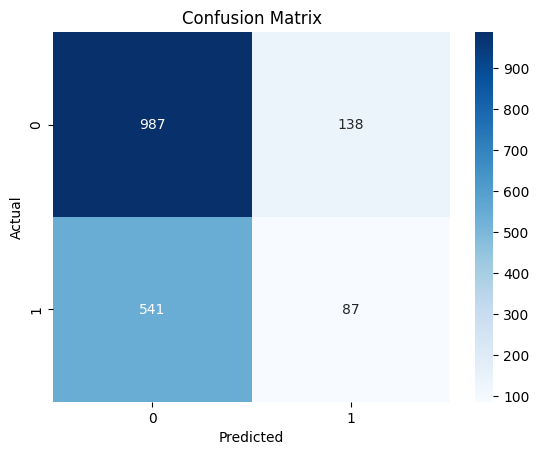

In [3]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = rf_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [5]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'heart_attack_model.pkl')

# Save the scaler if you used one
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Load model
model = joblib.load('heart_attack_model.pkl')

# Load scaler
scaler = joblib.load('scaler.pkl')